<a href="https://colab.research.google.com/github/sparkcool1232/AI/blob/main/keras_CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,466 (91.66 KB)

 Trainable params: 23,466 (91.66 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original=test_label #for crosstab
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

In [14]:
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.6863 - loss: 10.2935
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.9535 - loss: 0.2989
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9719 - loss: 0.1217
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.9812 - loss: 0.0684
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9861 - loss: 0.0495
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9889 - loss: 0.0381
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9909 - loss: 0.0298
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.9926 - loss: 0.0229
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9941 - loss: 0.0182
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9949 - loss: 0.0150


In [13]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1044 - loss: 54.7694
0.09799999743700027


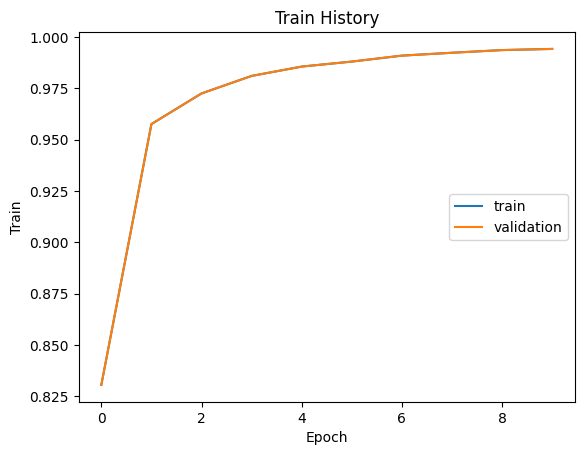

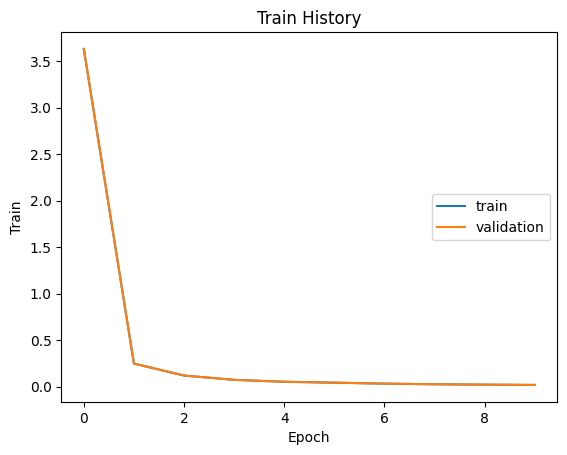

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,0,3,0,0,1,2,2,3,0
1,3,1116,3,2,0,1,1,3,6,0
2,2,3,1016,3,0,1,1,3,3,0
3,0,0,1,1000,0,3,0,4,2,0
4,0,1,2,0,950,0,2,1,2,24
5,2,0,0,3,0,879,1,0,5,2
6,4,3,0,1,1,7,937,0,5,0
7,0,2,6,1,3,0,0,1008,0,8
8,4,0,1,2,0,6,2,4,951,4


In [15]:
#繪製正確性與損失立歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict(test_data)
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])